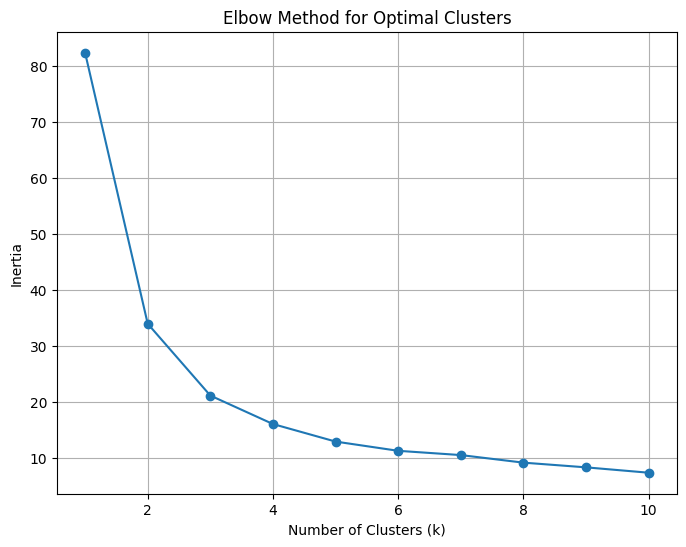

Cluster Summary:
  Cluster math score        reading score        writing score          gender
                mean median          mean median          mean median <lambda>
0       0  65.475524   65.0     68.699301   69.0     68.058275   68.0   female
1       1  48.873563   50.0     50.938697   53.0     48.785441   51.0     male
2       2  81.432258   81.0     85.167742   84.0     84.270968   83.0   female


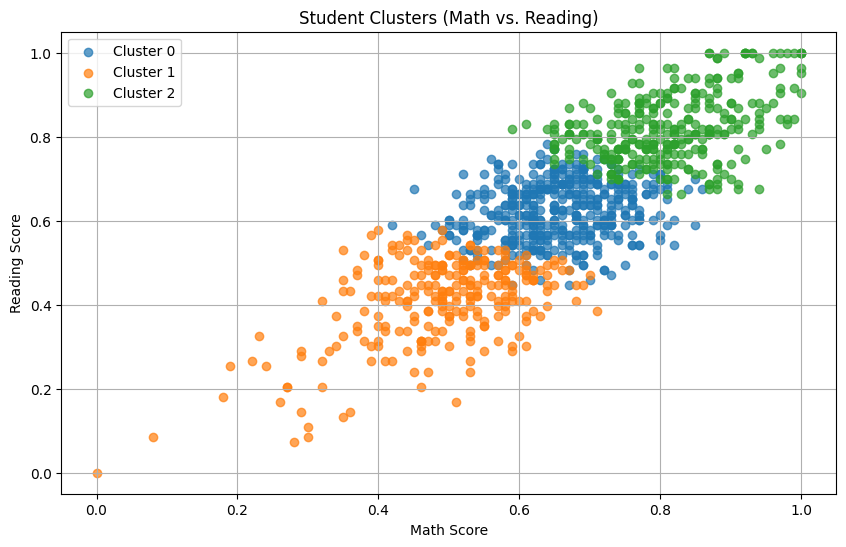

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans

student_data_path = 'StudentsPerformance.csv'
student_data = pd.read_csv(student_data_path)

categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    student_data[col] = le.fit_transform(student_data[col])
    label_encoders[col] = le


features = student_data[['math score', 'reading score', 'writing score']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
student_data['Cluster'] = cluster_labels

cluster_summary = student_data.groupby('Cluster').agg({
    'math score': ['mean', 'median'],
    'reading score': ['mean', 'median'],
    'writing score': ['mean', 'median'],
    'gender': lambda x: label_encoders['gender'].inverse_transform([int(x.mode()[0])])[0]
}).reset_index()


print("Cluster Summary:")
print(cluster_summary)


plt.figure(figsize=(10, 6))
for cluster in range(3):  # determined this from elbow method that k=3
    cluster_points = scaled_features[student_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Student Clusters (Math vs. Reading)')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.show()
